In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from psdr import PolynomialRidgeApproximation, PolynomialRidgeBound
from psdr.demos import build_multif_design_domain, build_multif_random_domain
from psdr.demos.multif import qoi_names

## Setting up and normalizing data
Here we use data generated using stretched sampling: 150 random samples to start and then 1000 samples of stretching in parallel for the 16 PN agglomeration QoIs. 

In [4]:
design_domain = build_multif_design_domain()
random_domain = build_multif_random_domain(clip = 2)
random_domain_large = build_multif_random_domain()
total_domain = design_domain + random_domain

In [5]:
X = np.loadtxt('claire.input')
Y = np.loadtxt('claire.output')

In [6]:
X_norm = total_domain.normalize(X)

## Build Bounding Ridge Approximation
Here we build a polynomial ridge bound on one of the QoIs from MULTIF. This first fits a polynomial ridge approximation and then fits a bounding polynomial with the ridge direction held constant.

In [19]:
#qoi = 4 # Thrust
qoi = 19 # Thermal Layer Temp Failure
I = np.isfinite(Y[:,qoi])
# If an approximation is desired, use PolynomialRidgeApproximation instead
prb = PolynomialRidgeBound(degree = 5, subspace_dimension = 1)
prb.fit(X_norm[I], Y[I,qoi])

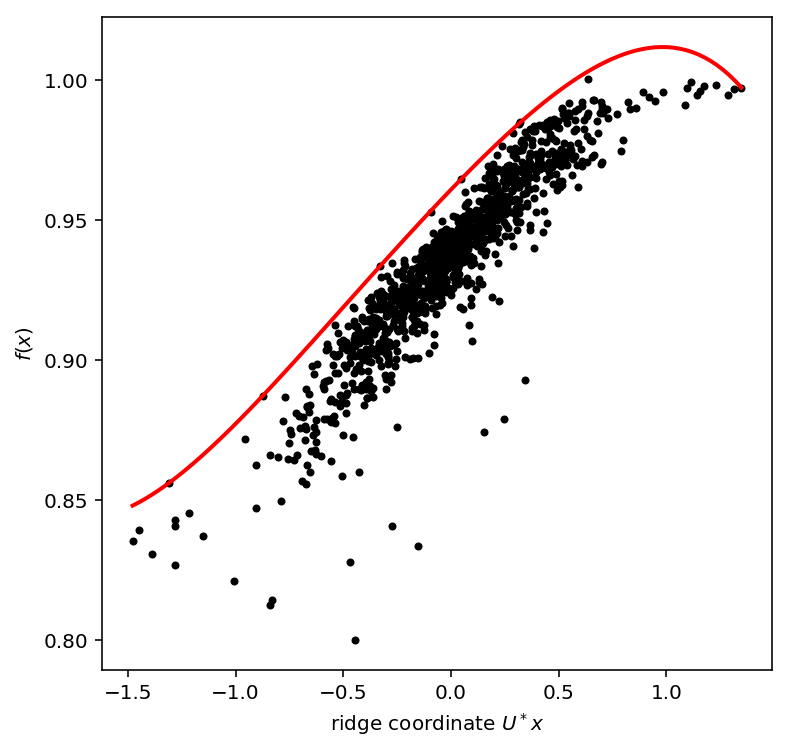

In [20]:
prb.plot();

In [21]:
# The ridge direction 
print prb.U.T

[[ 1.46862177e-02 -5.79694516e-03 -2.36485169e-02  2.03435663e-02
  -7.91798201e-02 -6.13751503e-02 -1.23945059e-02  2.16684487e-04
  -3.11938584e-02  4.65454955e-02  5.90296081e-02  4.98727040e-01
   8.52719632e-02 -5.00898508e-02  8.05823646e-02  1.78690801e-01
   6.91251675e-01  2.88323792e-01 -2.68896281e-03  2.31833413e-03
  -2.34492536e-03  1.51650056e-03 -3.79143981e-02 -9.62254884e-03
  -2.65633087e-03 -1.99849713e-03 -6.30031294e-02 -3.87175284e-02
  -8.44650448e-04  2.78020454e-02  7.50623735e-03  1.38315801e-01
   4.53739181e-03  4.84751594e-03 -9.36858279e-03  4.87755998e-03
  -2.43022620e-03  1.27374259e-02 -1.02704747e-02 -3.36680367e-03
  -5.78944367e-03  5.05173433e-03 -1.95676242e-03 -1.08067669e-02
   2.57869942e-03  1.18026537e-02  6.33732897e-03 -2.35070846e-03
   4.19807776e-03 -4.73165285e-03  4.56822531e-03  5.41061441e-03
   6.61452340e-03  5.82687035e-03  1.30769060e-03 -3.99744645e-03
   8.20416505e-03  1.66190553e-03 -2.88102780e-04 -3.16767382e-03
   1.76494

## Forward Propagation
Here we evaluate the ridge bound at a single point in the design space and for multiple values in the random space to estimate probability of failure.

In [13]:
# pick a point in the design space
xdesign = design_domain.center
# draw samples from the random domain
Xrand = random_domain_large.sample(1e5)

# Combine into a single 
Xtest = np.hstack([np.tile(xdesign, (Xrand.shape[0],1)), Xrand])
Xtest_norm = total_domain.normalize(Xtest)

# Upper bound ridge approximation bound predictions
fx = prb.predict(Xtest_norm)
print np.max(fx)
# Probability of failure
print "Probability of failure %5.2e" % ((1.*np.sum(fx > 1.))/fx.shape[0])

1.0040655348173342
Probability of failure 1.00e-04


## Other Quantities of Interest
The list below shows the column in Y and the corresponding QoI name for the PN constraint agglomerations.

In [14]:
for qoi in [1,4] + list(range(19,33)):
    print "%2d: %s" % (qoi, qoi_names[qoi])

 1: Mass
 4: Thrust
19: Thermal Layer Temp. Fail. (PN)
20: Inside Load Layer Temp. Fail. (PN)
21: Middle Load Layer Temp. Fail. (PN)
22: Outside Load Layer Temp. Fail. (PN)
23: Thermal Layer Struct. Fail. (PN)
24: Inside Load Layer Struct. Fail. (PN)
25: Middle Load Layer Struct. Fail. (PN)
26: Outside Load Layer Struct. Fail. (PN)
27: Stringers Struct. Fail. (PN)
28: Baffle 1 Struct. Fail. (PN)
29: Baffle 2 Struct. Fail. (PN)
30: Baffle 3 Struct. Fail. (PN)
31: Baffle 4 Struct. Fail. (PN)
32: Baffle 5 Struct. Fail. (PN)
